<a href="https://colab.research.google.com/github/chaudharygarima29/Machine_learning_projects/blob/main/polynomialregressionfromscratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dataset=pd.read_excel("/content/Book1.xlsx")

In [ ]:
group_num=17
start_row = (group_num - 1) * 20 + 2
end_row   = group_num * 20 + 1

In [ ]:
start_index=start_row-1
end_index=end_row

In [ ]:
data=dataset.iloc[start_index:end_index].copy()

In [ ]:
data.head()

,AT,PE
321,23.70,436.94
322,16.22,461.06
323,24.75,438.28
324,10.48,472.61
325,29.53,426.85


In [ ]:
Y_all = np.asarray(data['PE'].values)
X_all = np.asarray(data['AT'].values)

[23.7  24.66 29.87 16.22  9.75 12.59 24.72 10.48 32.63 22.99 10.77 24.75
 19.55 31.38 29.53 21.19] [436.94 445.26 431.8  461.06 480.35 470.18 443.06 472.61 425.72 446.67
 477.81 438.28 455.56 430.58 426.85 452.43]


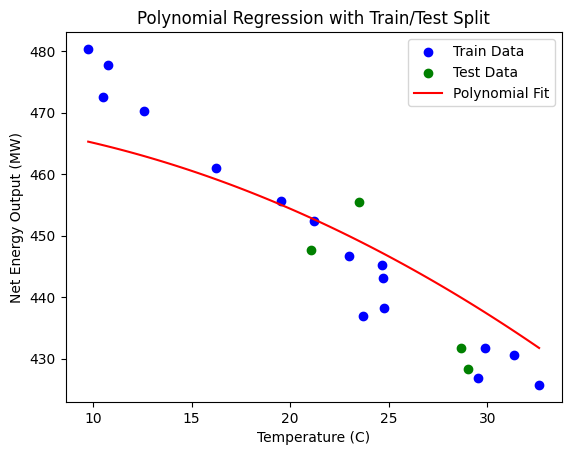

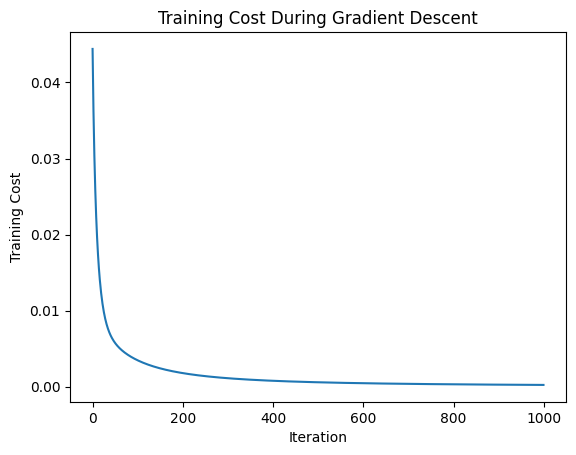

In [ ]:
# 2. Shuffle and split data
indices = np.arange(len(X_all))
np.random.seed(42)  # Set a random seed for reproducibility
np.random.shuffle(indices)

# 80-20 train-test split
split_idx = int(0.8 * len(X_all))
train_idx, test_idx = indices[:split_idx], indices[split_idx:]

X_train, Y_train = X_all[train_idx], Y_all[train_idx]
X_test, Y_test = X_all[test_idx], Y_all[test_idx]


# 3. Normalize
Xmin, Xmax = np.min(X_train), np.max(X_train)
Ymin, Ymax = np.min(Y_train), np.max(Y_train)
X_train_norm = (X_train - Xmin) / (Xmax - Xmin)
Y_train_norm = (Y_train - Ymin) / (Ymax - Ymin)
X_test_norm = (X_test - Xmin) / (Xmax - Xmin)
Y_test_norm = (Y_test - Ymin) / (Ymax - Ymin)

# 4. Define regression functions (same as before)
def predict(X, theta2, theta1, theta0):
    return theta2 * X**2 + theta1 * X + theta0

def cost(X, Y, theta2, theta1, theta0):
    n = len(X)
    predictions = predict(X, theta2, theta1, theta0)
    return np.sum((Y - predictions) ** 4) / (4 * n)

def gradients(X, Y, theta2, theta1, theta0):
    n = len(X)
    predictions = predict(X, theta2, theta1, theta0)
    errors = Y - predictions
    d_theta2 = -np.sum(4 * (errors ** 3) * (X ** 2)) / (4 * n)
    d_theta1 = -np.sum(4 * (errors ** 3) * X) / (4 * n)
    d_theta0 = -np.sum(4 * (errors ** 3)) / (4 * n)
    return d_theta2, d_theta1, d_theta0

# 5. Train on training set
theta2, theta1, theta0 = 0.0, 0.0, 0.0
learning_rate = 0.1
iterations = 1000
costs = []

for i in range(iterations):
    d_theta2, d_theta1, d_theta0 = gradients(X_train_norm, Y_train_norm, theta2, theta1, theta0)
    theta2 -= learning_rate * d_theta2
    theta1 -= learning_rate * d_theta1
    theta0 -= learning_rate * d_theta0
    c = cost(X_train_norm, Y_train_norm, theta2, theta1, theta0)
    costs.append(c)

# 6. Evaluate on test set
Y_test_pred_norm = predict(X_test_norm, theta2, theta1, theta0)
Y_test_pred = Y_test_pred_norm * (Ymax - Ymin) + Ymin

# 7. Visualize
plt.scatter(X_train, Y_train, color='blue', label='Train Data')
plt.scatter(X_test, Y_test, color='green', label='Test Data')
X_line = np.linspace(Xmin, Xmax, 100)
X_line_norm = (X_line - Xmin) / (Xmax - Xmin)
Y_line_pred_norm = predict(X_line_norm, theta2, theta1, theta0)
Y_line_pred = Y_line_pred_norm * (Ymax - Ymin) + Ymin
plt.plot(X_line, Y_line_pred, color='red', label='Polynomial Fit')
plt.xlabel('Temperature (C)')
plt.ylabel('Net Energy Output (MW)')
plt.legend()
plt.title('Polynomial Regression with Train/Test Split')
plt.show()

plt.plot(costs)
plt.xlabel('Iteration')
plt.ylabel('Training Cost')
plt.title('Training Cost During Gradient Descent')
plt.show()

# 8. Print root mean squared error (RMSE) for the test set
#rmse = np.sqrt(np.mean((Y_test - Y_test_pred) ** 2))
#print(f"Test RMSE: {rmse:.3f}")